# GRIP :THE SPARK FOUNDATION

# Task 2: Prediction using unsupervised Machine Learning

PROBLEM:From the given "Iris"dataset,predict the otimum number of clusters and represent it visually.

# Importing required libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import datasets
import seaborn as sns 

# Load the dataset

In [4]:
iris=datasets.load_iris()
iris=pd.DataFrame(iris.data,columns=iris.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


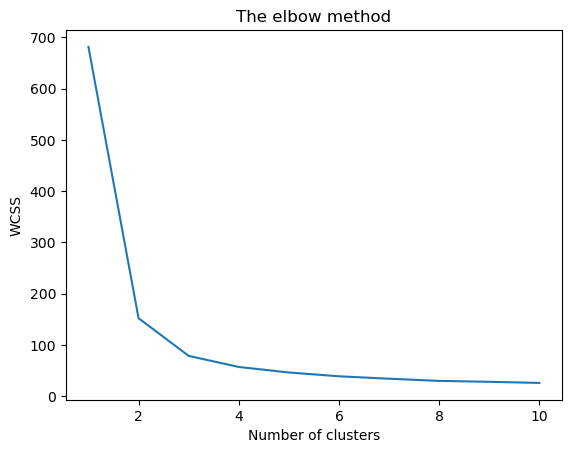

In [8]:
#Finding the optimum number of clusters for k-means classification
x=iris.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss= []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter =300,n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
#Plotting the results onto a line graph'
# allowing us to observe 'the elbow(The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.)'
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In above method , the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
From this we choose the number of clusters as 3.

# Applying kmeans to the dataset.

In [13]:
# Applying kmeans to the dataset/ Creating the kmeans classifier 
kmeans= KMeans(n_clusters=3,init='k-means++',
              max_iter=300,n_init=10,random_state=0)
y_kmeans= kmeans.fit_predict(x)

In [14]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Visualisation

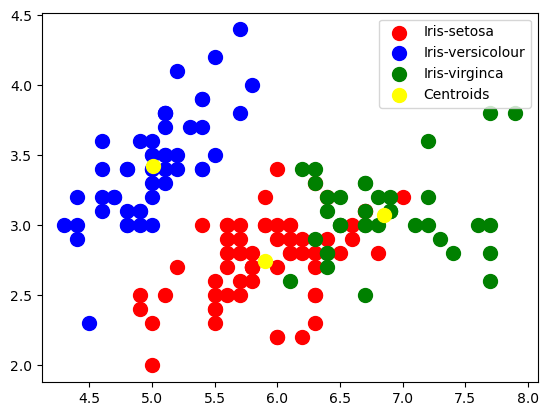

In [17]:
# Visualising the clusters - on the first two columns
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
           s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],
           s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],
           s=100,c='green',label='Iris-virginca')

#Plotting the centroids of the clusters 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c='yellow',label='Centroids')

plt.legend()

The plot describe the 3 clusters formed by using K-means for the three species of Iris flower.

In [18]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

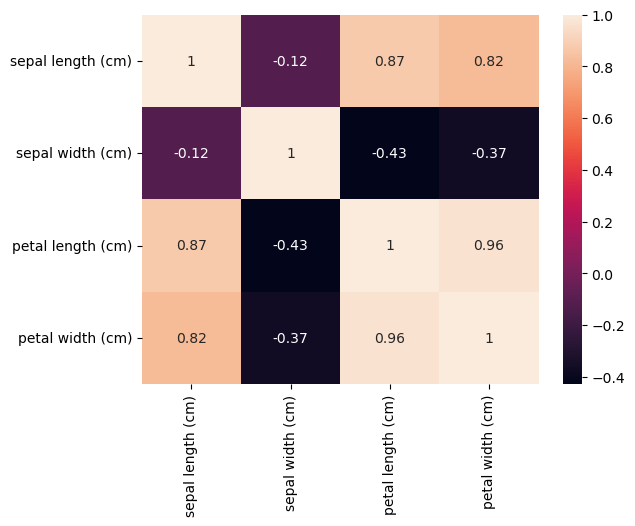

In [19]:
sns.heatmap(iris.corr(),annot=True)

Thank you...!!!